In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
tem=pd.read_csv('/content/drive/My Drive/사과예측(10년_부산_후지)/Data/ta_20200417141730_기온.csv',encoding='euc-kr',sep=',',skiprows=6)
wet=pd.read_csv('/content/drive/My Drive/사과예측(10년_부산_후지)/Data/rn_20200417141829_강수.csv',encoding='euc-kr',sep=',',skiprows=6)
A_price_h=pd.read_csv('/content/drive/My Drive/사과예측(10년_부산_후지)/Data/가격정보_후지_상품(1).csv',encoding='utf-8',sep=',')
A_price_m=pd.read_csv('/content/drive/My Drive/사과예측(10년_부산_후지)/Data/가격정보_후지_중품(1).csv',encoding='utf-8',sep=',')

In [0]:
weather=tem.merge(wet,how='inner',on='날짜')# 기온과 강수량 데이터 합치기

In [41]:
A_price_h.head()

,구분,01월 04일,01월 05일,01월 06일,01월 07일,01월 08일,01월 11일,01월 12일,01월 13일,01월 14일,01월 15일,01월 18일,01월 19일,01월 20일,01월 21일,01월 22일,01월 25일,01월 26일,01월 27일,01월 28일,01월 29일,02월 01일,02월 02일,02월 03일,02월 04일,02월 05일,02월 08일,02월 09일,02월 10일,02월 11일,02월 12일,02월 16일,02월 17일,02월 18일,02월 19일,02월 22일,02월 23일,02월 24일,02월 25일,02월 26일,...,11월 04일.6,11월 05일.5,11월 06일.6,11월 07일.7,11월 08일.7,11월 11일.6,11월 12일.6,11월 13일.6,11월 14일.7,11월 15일.7,11월 18일.6,11월 19일.6,11월 20일.6,11월 21일.7,11월 22일.7,11월 25일.6,11월 26일.6,11월 27일.6,11월 28일.7,11월 29일.7,12월 02일.5,12월 03일.6,12월 04일.5,12월 05일.7,12월 09일.6,12월 10일.6,12월 11일.6,12월 12일.7,12월 13일.7,12월 16일.6,12월 17일.6,12월 18일.6,12월 19일.6,12월 20일.7,12월 23일.6,12월 24일.6,12월 26일.7,12월 27일.7,12월 30일.6,12월 31일.6
0,평균,"31,333","31,333","31,333","31,333","31,333","31,333","31,333","32,667","32,667","32,667","32,667","32,667","32,667","32,667","32,667","32,667","34,667","34,667","34,667","34,667","36,667","36,667","36,667","38,667","40,000","40,000","40,000","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667",...,"33,000","33,000","33,000","33,000","33,000","31,000","31,000","31,000","31,000","33,000","38,000","36,000","40,000","40,000","40,000","40,000","34,000","32,000","31,000","31,000","31,000","32,000","34,000","34,000","35,000","36,000","36,000","36,000","39,000","39,000","39,000","39,000","38,000","38,000","38,000","38,000","38,000","38,000","38,000","36,000"
1,평년,"44,381","44,433","44,471","44,500","44,510","44,548","44,548","44,548","44,548","44,548","44,548","44,548","44,548","44,576","44,624","44,729","44,817","44,845","44,910","45,033","45,186","45,298","45,369","45,462","45,557","45,624","45,700","45,748","45,786","45,786","45,786","45,814","45,843","45,871","45,893","45,912","45,938","45,986","46,005",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,부산,"31,333","31,333","31,333","31,333","31,333","31,333","31,333","32,667","32,667","32,667","32,667","32,667","32,667","32,667","32,667","32,667","34,667","34,667","34,667","34,667","36,667","36,667","36,667","38,667","40,000","40,000","40,000","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667",...,"33,000","33,000","33,000","33,000","33,000","31,000","31,000","31,000","31,000","33,000","38,000","36,000","40,000","40,000","40,000","40,000","34,000","32,000","31,000","31,000","31,000","32,000","34,000","34,000","35,000","36,000","36,000","36,000","39,000","39,000","39,000","39,000","38,000","38,000","38,000","38,000","38,000","38,000","38,000","36,000"


In [0]:
weather['강수량(mm)']=weather['강수량(mm)'].fillna(0)#강수량 nan데이터 0으로 채우기

In [53]:
weather.isnull().sum() #결측치 확인

날짜         0
지점_x       0
평균기온(℃)    0
최저기온(℃)    0
최고기온(℃)    0
지점_y       0
강수량(mm)    0
dtype: int64

In [56]:
weather.shape

(3653, 7)

In [57]:
weather.info() # 날짜 to datetime gogo

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3653 entries, 0 to 3652
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       3653 non-null   object 
 1   지점_x     3653 non-null   int64  
 2   평균기온(℃)  3653 non-null   float64
 3   최저기온(℃)  3653 non-null   float64
 4   최고기온(℃)  3653 non-null   float64
 5   지점_y     3653 non-null   int64  
 6   강수량(mm)  3653 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 228.3+ KB


In [59]:
weather.head()

,날짜,지점_x,평균기온(℃),최저기온(℃),최고기온(℃),지점_y,강수량(mm)
0,2010-01-01,159,-1.6,-6.7,4.3,159,0.0
1,2010-01-02,159,4.7,-0.9,11.3,159,0.0
2,2010-01-03,159,1.7,-2.0,5.9,159,0.0
3,2010-01-04,159,3.9,0.4,9.4,159,3.5
4,2010-01-05,159,-1.2,-4.4,2.6,159,0.0


In [0]:
weather['날짜']=pd.to_datetime(weather['날짜'],format='%Y-%m-%d') #대문자 y조심

In [66]:
weather.info() #날씨 칼럼 완성

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3653 entries, 0 to 3652
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       3653 non-null   datetime64[ns]
 1   지점_x     3653 non-null   int64         
 2   평균기온(℃)  3653 non-null   float64       
 3   최저기온(℃)  3653 non-null   float64       
 4   최고기온(℃)  3653 non-null   float64       
 5   지점_y     3653 non-null   int64         
 6   강수량(mm)  3653 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 228.3 KB


In [67]:
# 가격 돌리기
A_price_h.head()

,구분,01월 04일,01월 05일,01월 06일,01월 07일,01월 08일,01월 11일,01월 12일,01월 13일,01월 14일,01월 15일,01월 18일,01월 19일,01월 20일,01월 21일,01월 22일,01월 25일,01월 26일,01월 27일,01월 28일,01월 29일,02월 01일,02월 02일,02월 03일,02월 04일,02월 05일,02월 08일,02월 09일,02월 10일,02월 11일,02월 12일,02월 16일,02월 17일,02월 18일,02월 19일,02월 22일,02월 23일,02월 24일,02월 25일,02월 26일,...,11월 04일.6,11월 05일.5,11월 06일.6,11월 07일.7,11월 08일.7,11월 11일.6,11월 12일.6,11월 13일.6,11월 14일.7,11월 15일.7,11월 18일.6,11월 19일.6,11월 20일.6,11월 21일.7,11월 22일.7,11월 25일.6,11월 26일.6,11월 27일.6,11월 28일.7,11월 29일.7,12월 02일.5,12월 03일.6,12월 04일.5,12월 05일.7,12월 09일.6,12월 10일.6,12월 11일.6,12월 12일.7,12월 13일.7,12월 16일.6,12월 17일.6,12월 18일.6,12월 19일.6,12월 20일.7,12월 23일.6,12월 24일.6,12월 26일.7,12월 27일.7,12월 30일.6,12월 31일.6
0,평균,"31,333","31,333","31,333","31,333","31,333","31,333","31,333","32,667","32,667","32,667","32,667","32,667","32,667","32,667","32,667","32,667","34,667","34,667","34,667","34,667","36,667","36,667","36,667","38,667","40,000","40,000","40,000","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667",...,"33,000","33,000","33,000","33,000","33,000","31,000","31,000","31,000","31,000","33,000","38,000","36,000","40,000","40,000","40,000","40,000","34,000","32,000","31,000","31,000","31,000","32,000","34,000","34,000","35,000","36,000","36,000","36,000","39,000","39,000","39,000","39,000","38,000","38,000","38,000","38,000","38,000","38,000","38,000","36,000"
1,평년,"44,381","44,433","44,471","44,500","44,510","44,548","44,548","44,548","44,548","44,548","44,548","44,548","44,548","44,576","44,624","44,729","44,817","44,845","44,910","45,033","45,186","45,298","45,369","45,462","45,557","45,624","45,700","45,748","45,786","45,786","45,786","45,814","45,843","45,871","45,893","45,912","45,938","45,986","46,005",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,부산,"31,333","31,333","31,333","31,333","31,333","31,333","31,333","32,667","32,667","32,667","32,667","32,667","32,667","32,667","32,667","32,667","34,667","34,667","34,667","34,667","36,667","36,667","36,667","38,667","40,000","40,000","40,000","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667",...,"33,000","33,000","33,000","33,000","33,000","31,000","31,000","31,000","31,000","33,000","38,000","36,000","40,000","40,000","40,000","40,000","34,000","32,000","31,000","31,000","31,000","32,000","34,000","34,000","35,000","36,000","36,000","36,000","39,000","39,000","39,000","39,000","38,000","38,000","38,000","38,000","38,000","38,000","38,000","36,000"


In [68]:
A_price_m.head()

,구분,01월 04일,01월 05일,01월 06일,01월 07일,01월 08일,01월 11일,01월 12일,01월 13일,01월 14일,01월 15일,01월 18일,01월 19일,01월 20일,01월 21일,01월 22일,01월 25일,01월 26일,01월 27일,01월 28일,01월 29일,02월 01일,02월 02일,02월 03일,02월 04일,02월 05일,02월 08일,02월 09일,02월 10일,02월 11일,02월 12일,02월 16일,02월 17일,02월 18일,02월 19일,02월 22일,02월 23일,02월 24일,02월 25일,02월 26일,...,11월 04일.6,11월 05일.5,11월 06일.6,11월 07일.7,11월 08일.7,11월 11일.6,11월 12일.6,11월 13일.6,11월 14일.7,11월 15일.7,11월 18일.6,11월 19일.6,11월 20일.6,11월 21일.7,11월 22일.7,11월 25일.6,11월 26일.6,11월 27일.6,11월 28일.7,11월 29일.7,12월 02일.5,12월 03일.6,12월 04일.5,12월 05일.7,12월 09일.6,12월 10일.6,12월 11일.6,12월 12일.7,12월 13일.7,12월 16일.6,12월 17일.6,12월 18일.6,12월 19일.6,12월 20일.7,12월 23일.6,12월 24일.6,12월 26일.7,12월 27일.7,12월 30일.6,12월 31일.6
0,평균,"26,667","26,667","26,667","26,667","26,667","26,667","26,667","27,333","27,333","27,333","27,333","27,333","27,333","27,333","27,333","27,333","28,667","28,667","28,667","28,667","29,333","29,333","29,333","30,667","33,333","33,333","33,333","32,667","32,667","32,667","32,667","32,667","32,667","32,667","32,667","32,667","32,667","32,667","32,667",...,"29,000","29,000","29,000","29,000","29,000","27,000","27,000","27,000","27,000","29,000","34,000","32,000","36,000","36,000","36,000","36,000","30,000","28,000","27,000","27,000","27,000","28,000","30,000","30,000","31,000","32,000","32,000","32,000","35,000","35,000","35,000","35,000","34,000","34,000","34,000","34,000","34,000","34,000","34,000","32,000"
1,평년,"36,167","36,219","36,257","36,286","36,295","36,333","36,333","36,333","36,333","36,333","36,333","36,333","36,333","36,371","36,438","36,533","36,605","36,619","36,691","36,819","36,905","36,976","37,017","37,071","37,143","37,176","37,200","37,210","37,238","37,238","37,238","37,267","37,295","37,324","37,345","37,355","37,371","37,410","37,419",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,부산,"26,667","26,667","26,667","26,667","26,667","26,667","26,667","27,333","27,333","27,333","27,333","27,333","27,333","27,333","27,333","27,333","28,667","28,667","28,667","28,667","29,333","29,333","29,333","30,667","33,333","33,333","33,333","32,667","32,667","32,667","32,667","32,667","32,667","32,667","32,667","32,667","32,667","32,667","32,667",...,"29,000","29,000","29,000","29,000","29,000","27,000","27,000","27,000","27,000","29,000","34,000","32,000","36,000","36,000","36,000","36,000","30,000","28,000","27,000","27,000","27,000","28,000","30,000","30,000","31,000","32,000","32,000","32,000","35,000","35,000","35,000","35,000","34,000","34,000","34,000","34,000","34,000","34,000","34,000","32,000"


In [0]:
A_price_h_columns=A_price_h.columns # 가격 일/ 컬럼

In [83]:
A_price_h[A_price_h['구분']=='부산'].shape[1]

2122

In [89]:
A_price_h[A_price_h['구분']=='부산']

,구분,01월 04일,01월 05일,01월 06일,01월 07일,01월 08일,01월 11일,01월 12일,01월 13일,01월 14일,01월 15일,01월 18일,01월 19일,01월 20일,01월 21일,01월 22일,01월 25일,01월 26일,01월 27일,01월 28일,01월 29일,02월 01일,02월 02일,02월 03일,02월 04일,02월 05일,02월 08일,02월 09일,02월 10일,02월 11일,02월 12일,02월 16일,02월 17일,02월 18일,02월 19일,02월 22일,02월 23일,02월 24일,02월 25일,02월 26일,...,11월 04일.6,11월 05일.5,11월 06일.6,11월 07일.7,11월 08일.7,11월 11일.6,11월 12일.6,11월 13일.6,11월 14일.7,11월 15일.7,11월 18일.6,11월 19일.6,11월 20일.6,11월 21일.7,11월 22일.7,11월 25일.6,11월 26일.6,11월 27일.6,11월 28일.7,11월 29일.7,12월 02일.5,12월 03일.6,12월 04일.5,12월 05일.7,12월 09일.6,12월 10일.6,12월 11일.6,12월 12일.7,12월 13일.7,12월 16일.6,12월 17일.6,12월 18일.6,12월 19일.6,12월 20일.7,12월 23일.6,12월 24일.6,12월 26일.7,12월 27일.7,12월 30일.6,12월 31일.6
2,부산,"31,333","31,333","31,333","31,333","31,333","31,333","31,333","32,667","32,667","32,667","32,667","32,667","32,667","32,667","32,667","32,667","34,667","34,667","34,667","34,667","36,667","36,667","36,667","38,667","40,000","40,000","40,000","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667",...,"33,000","33,000","33,000","33,000","33,000","31,000","31,000","31,000","31,000","33,000","38,000","36,000","40,000","40,000","40,000","40,000","34,000","32,000","31,000","31,000","31,000","32,000","34,000","34,000","35,000","36,000","36,000","36,000","39,000","39,000","39,000","39,000","38,000","38,000","38,000","38,000","38,000","38,000","38,000","36,000"


In [0]:
tmp=A_price_h[A_price_h['구분']=='부산']

In [152]:
tmp.melt()

,구분,01월 04일,01월 05일,01월 06일,01월 07일,01월 08일,01월 11일,01월 12일,01월 13일,01월 14일,01월 15일,01월 18일,01월 19일,01월 20일,01월 21일,01월 22일,01월 25일,01월 26일,01월 27일,01월 28일,01월 29일,02월 01일,02월 02일,02월 03일,02월 04일,02월 05일,02월 08일,02월 09일,02월 10일,02월 11일,02월 12일,02월 16일,02월 17일,02월 18일,02월 19일,02월 22일,02월 23일,02월 24일,02월 25일,02월 26일,...,11월 04일.6,11월 05일.5,11월 06일.6,11월 07일.7,11월 08일.7,11월 11일.6,11월 12일.6,11월 13일.6,11월 14일.7,11월 15일.7,11월 18일.6,11월 19일.6,11월 20일.6,11월 21일.7,11월 22일.7,11월 25일.6,11월 26일.6,11월 27일.6,11월 28일.7,11월 29일.7,12월 02일.5,12월 03일.6,12월 04일.5,12월 05일.7,12월 09일.6,12월 10일.6,12월 11일.6,12월 12일.7,12월 13일.7,12월 16일.6,12월 17일.6,12월 18일.6,12월 19일.6,12월 20일.7,12월 23일.6,12월 24일.6,12월 26일.7,12월 27일.7,12월 30일.6,12월 31일.6
2,부산,"31,333","31,333","31,333","31,333","31,333","31,333","31,333","32,667","32,667","32,667","32,667","32,667","32,667","32,667","32,667","32,667","34,667","34,667","34,667","34,667","36,667","36,667","36,667","38,667","40,000","40,000","40,000","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667","38,667",...,"33,000","33,000","33,000","33,000","33,000","31,000","31,000","31,000","31,000","33,000","38,000","36,000","40,000","40,000","40,000","40,000","34,000","32,000","31,000","31,000","31,000","32,000","34,000","34,000","35,000","36,000","36,000","36,000","39,000","39,000","39,000","39,000","38,000","38,000","38,000","38,000","38,000","38,000","38,000","36,000"


In [90]:
A_price_h[A_price_h['구분']=='부산'].iloc[0][1]

'부산'

In [0]:
a=[]

for i in range(A_price_h[A_price_h['구분']=='부산'].shape[1]):
  a.append(A_price_h[A_price_h['구분']=='부산'].iloc[0][i])


In [97]:
print(len(a),a[0],type(a))

2122 부산 <class 'list'>


In [72]:
print(type(A_price_h_columns),len(A_price_h_columns))

<class 'pandas.core.indexes.base.Index'> 2122


In [102]:
A_price_h_columns[1]

'01월 04일'

In [0]:
b=[]

for i in range(A_price_h_columns.shape[0]):
  b.append(A_price_h_columns[i])

In [104]:
len(b)

2122

In [0]:
df=pd.DataFrame({'price':a,
                  '날짜':b})

In [148]:
df.tail(30)

,price,날짜
2092,"38,000",11-18.6
2093,"36,000",11-19.6
2094,"40,000",11-20.6
2095,"40,000",11-21.7
2096,"40,000",11-22.7
2097,"40,000",11-25.6
2098,"34,000",11-26.6
2099,"32,000",11-27.6
2100,"31,000",11-28.7
2101,"31,000",11-29.7


In [0]:
df['날짜']=df['날짜'].str.replace('월 ','-').str.replace('일', '')

In [0]:
df['날짜']=df['날짜'].str[:5]

In [179]:
df.head()

,price,날짜
0,부산,구분
1,"31,333",01-04
2,"31,333",01-05
3,"31,333",01-06
4,"31,333",01-07


In [0]:
df=df.iloc[1:,:]

In [188]:
df['날']=pd.to_datetime(df['날짜'],format='%m-%d')

ValueError: ignored

In [189]:
weather.head()

,날짜,지점_x,평균기온(℃),최저기온(℃),최고기온(℃),지점_y,강수량(mm)
0,2010-01-01,159,-1.6,-6.7,4.3,159,0.0
1,2010-01-02,159,4.7,-0.9,11.3,159,0.0
2,2010-01-03,159,1.7,-2.0,5.9,159,0.0
3,2010-01-04,159,3.9,0.4,9.4,159,3.5
4,2010-01-05,159,-1.2,-4.4,2.6,159,0.0


In [190]:
df.head()

,price,날짜,날
1,"31,333",01-04,1900-01-04 00:01:00
2,"31,333",01-05,1900-01-05 00:01:00
3,"31,333",01-06,1900-01-06 00:01:00
4,"31,333",01-07,1900-01-07 00:01:00
5,"31,333",01-08,1900-01-08 00:01:00


In [0]:
2010 > 220

In [212]:
df['날짜'].iloc[:1]

1    01-04
Name: 날짜, dtype: object

In [0]:
for i in range(1,df['날짜'].iloc[:220].shape[0]):
  df['날'].iloc[:i]='2010-'+ df['날짜'].iloc[:i] # 2010

In [0]:
tmp1=220
tmp2=423
for i in range(tmp1,tmp2):
  df['날'].iloc[:i]='2011-'+ df['날짜'].iloc[:i] # 2011

In [0]:
df['날짜'].iloc[425:632] # 2012 

In [0]:
tmp1=423
tmp2=632
for i in range(tmp1,tmp2):
  df['날'].iloc[:i]='2012-'+ df['날짜'].iloc[:i] # 2012

In [251]:
df['날짜'].iloc[633:845] # 2013

634    01-03
635    01-04
636    01-07
637    01-08
638    01-09
       ...  
841    12-24
842    12-26
843    12-27
844    12-30
845    12-31
Name: 날짜, Length: 212, dtype: object

In [0]:
tmp1=632
tmp2=845
for i in range(tmp1,tmp2):
  df['날'].iloc[:i]='2013-'+ df['날짜'].iloc[:i] # 2013

In [0]:
df['날짜'].iloc[846:1054] # 2014

In [0]:
tmp1=845
tmp2=1054
for i in range(tmp1,tmp2):
  df['날'].iloc[:i]='2014-'+ df['날짜'].iloc[:i] # 2014

In [260]:
df['날짜'].iloc[1055:1259] # 2015

1056    01-05
1057    01-06
1058    01-07
1059    01-08
1060    01-09
        ...  
1255    12-24
1256    12-28
1257    12-29
1258    12-30
1259    12-31
Name: 날짜, Length: 204, dtype: object

In [0]:
tmp1=1054
tmp2=1259
for i in range(tmp1,tmp2):
  df['날'].iloc[:i]='2015-'+ df['날짜'].iloc[:i] # 2015

In [338]:
df.iloc[219]

price        60,000
날짜            12-31
날        2012-12-31
Name: 220, dtype: object

In [266]:
df['날짜'].iloc[1260:1473] # 2016

1261    01-05
1262    01-06
1263    01-07
1264    01-08
1265    01-11
        ...  
1469    12-26
1470    12-27
1471    12-28
1472    12-29
1473    12-30
Name: 날짜, Length: 213, dtype: object

In [0]:
tmp1=1259
tmp2=1473
for i in range(tmp1,tmp2):
  df['날'].iloc[:i]='2016-'+ df['날짜'].iloc[:i] # 2016

In [271]:
df['날짜'].iloc[1474:1679] # 2017

1475    01-03
1476    01-04
1477    01-05
1478    01-06
1479    01-09
        ...  
1675    12-22
1676    12-26
1677    12-27
1678    12-28
1679    12-29
Name: 날짜, Length: 205, dtype: object

In [0]:
tmp1=1473
tmp2=1679
for i in range(tmp1,tmp2):
  df['날'].iloc[:i]='2017-'+ df['날짜'].iloc[:i] # 2017

In [277]:
df['날짜'].iloc[1680:1898] # 2018

1681    01-03
1682    01-04
1683    01-05
1684    01-08
1685    01-09
        ...  
1894    12-24
1895    12-26
1896    12-27
1897    12-28
1898    12-31
Name: 날짜, Length: 218, dtype: object

In [0]:
tmp1=1679
tmp2=1898
for i in range(tmp1,tmp2):
  df['날'].iloc[:i]='2018-'+ df['날짜'].iloc[:i] # 2018

In [299]:
df['날짜'].iloc[1899:2121] # 2019

1900    01-03
1901    01-04
1902    01-07
1903    01-08
1904    01-09
        ...  
2117    12-24
2118    12-26
2119    12-27
2120    12-30
2121    12-31
Name: 날짜, Length: 222, dtype: object

In [0]:
tmp1=1898
tmp2=2122
for i in range(tmp1,tmp2):
  df['날'].iloc[:i]='2019-'+ df['날짜'].iloc[:i] # 2019

In [343]:
df.iloc[1054]

price        36,667
날짜            01-02
날        2015-01-02
Name: 1055, dtype: object

In [243]:
weather.head()

,날짜,지점_x,평균기온(℃),최저기온(℃),최고기온(℃),지점_y,강수량(mm)
0,2010-01-01,159,-1.6,-6.7,4.3,159,0.0
1,2010-01-02,159,4.7,-0.9,11.3,159,0.0
2,2010-01-03,159,1.7,-2.0,5.9,159,0.0
3,2010-01-04,159,3.9,0.4,9.4,159,3.5
4,2010-01-05,159,-1.2,-4.4,2.6,159,0.0


In [0]:
df['수정날짜1']=df['날짜']

In [0]:
df['날']=pd.to_datetime(df['날짜'], format='%Y-%m-%d')

In [0]:
df['날짜']=df['수정날짜']

In [0]:
df['날짜']=pd.to_datetime(df['날짜'],format='%Y-%m-%d')

In [0]:
df1=pd.merge(df,weather,how='right',on='날짜')

In [0]:
df2=df1.dropna().drop(columns=['날','수정날짜','수정날짜1','지점_x','지점_y'])

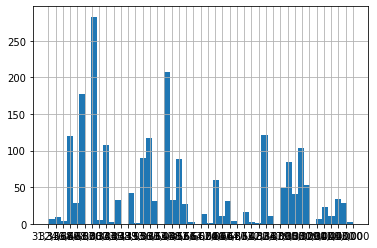

In [366]:
df2['price'].hist(bins=50)

In [367]:
df2.columns

Index(['price', '날짜', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)', '강수량(mm)'], dtype='object')

In [0]:
cols=['price', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)', '강수량(mm)']
corr = df2[cols].corr(method = 'pearson')

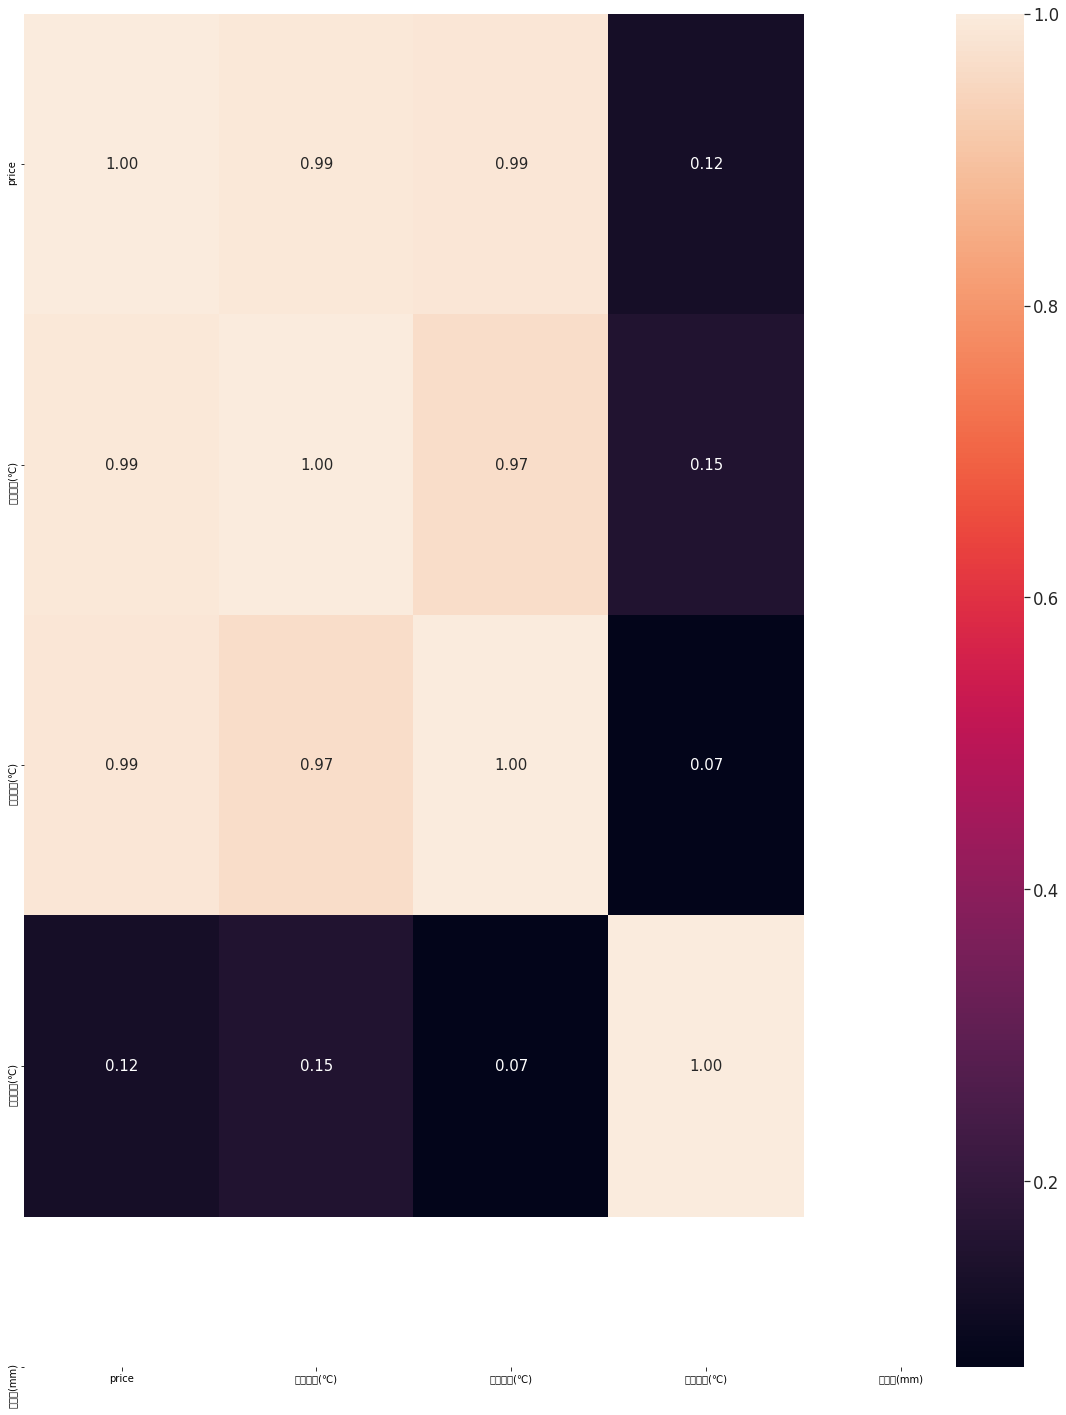

In [369]:
fig= plt.figure(figsize=(16,20))
ax = fig.gca()
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,annot=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols, xticklabels=cols, ax = ax)
plt.tight_layout()
plt.show()